In [12]:
from datetime import datetime
import seaborn as sns
import requests
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

In [13]:
def parse(x):
  return datetime.strptime(x, '%m/%d/%Y')

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv',parse_dates=['Quarter'],date_parser=parse)

In [18]:
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     61 non-null     datetime64[ns]
 1   Revenue     61 non-null     int64         
 2   Net Income  61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB


In [20]:
print("Rows : ",df.shape[0])
print("Columns : ",df.shape[1])
print("\nFeatures : \n",df.columns.tolist())
print("\nMissing values : \n",df.isnull().any())
print("\nUnique values : \n",df.nunique())

Rows :  61
Columns :  3

Features : 
 ['Quarter', 'Revenue', 'Net Income']

Missing values : 
 Quarter       False
Revenue       False
Net Income    False
dtype: bool

Unique values : 
 Quarter       61
Revenue       61
Net Income    57
dtype: int64


In [21]:
amazon_df = df.set_index('Quarter')

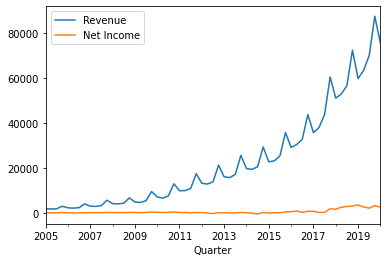

In [22]:
amazon_df.plot()

In [23]:
import plotly.express as px

fig = px.line(df, x='Quarter', y='Revenue', title='Amazon Revenue with Slider')

fig.update_xaxes(
  rangeslider_visible=True,
  rangeselector=dict(
    buttons=list([
      dict(count=1, label="1y", step="year", stepmode="backward"),
      dict(count=2, label="2y", step="year", stepmode="backward"),
      dict(count=3, label="3y", step="year", stepmode="backward"),
      dict(step="all")
    ])
  )
)
fig.show()


## Null Hypothesis : Data is stationary
## Alternate Hyopothesis : Data is not stationary

In [24]:
from statsmodels.tsa.stattools import kpss

In [26]:
tstest = kpss(amazon_df['Revenue'],'ct')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



In [27]:
tstest

(0.170051682108309,
 0.029956931576409152,
 11,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

Additive : $y_{t} = T_{t} + C_{t} + S_t + I_t$


Multiplicative : $y_{t} = T_{t} * C_{t} * S_t * I_t$


<Figure size 1584x504 with 0 Axes>

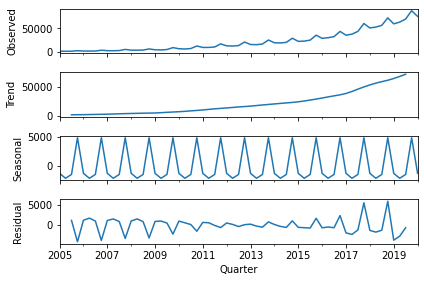

In [39]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(amazon_df['Revenue'],model='Multiplicative')

plt.figure(figsize=(22,7))
resplot = res.plot()


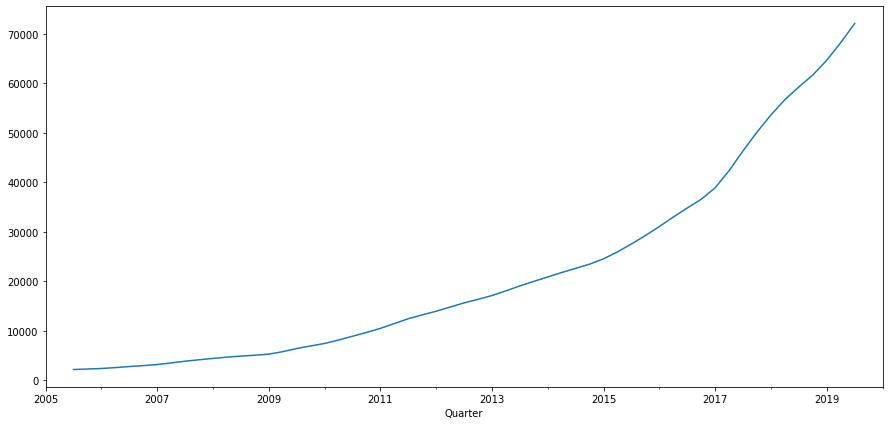

In [37]:
plt.figure(figsize=(15,7))
res.trend.plot()

In [41]:
res.observed

Quarter
2020-03-31    75452
2019-12-31    87437
2019-09-30    69981
2019-06-30    63404
2019-03-31    59700
              ...  
2006-03-31     2279
2005-12-31     2977
2005-09-30     1858
2005-06-30     1753
2005-03-31     1902
Name: Revenue, Length: 61, dtype: int64

In [42]:
print(res.trend)

Quarter
2020-03-31          NaN
2019-12-31          NaN
2019-09-30    72099.500
2019-06-30    68248.750
2019-03-31    64691.375
                ...    
2006-03-31     2369.375
2005-12-31     2265.000
2005-09-30     2169.625
2005-06-30          NaN
2005-03-31          NaN
Name: Revenue, Length: 61, dtype: float64


In [43]:
print(res.seasonal)

Quarter
2020-03-31   -1268.850893
2019-12-31    4828.345536
2019-09-30   -1451.652679
2019-06-30   -2107.841964
2019-03-31   -1268.850893
                 ...     
2006-03-31   -1268.850893
2005-12-31    4828.345536
2005-09-30   -1451.652679
2005-06-30   -2107.841964
2005-03-31   -1268.850893
Name: Revenue, Length: 61, dtype: float64


In [46]:
print(res.resid)

Quarter
2020-03-31            NaN
2019-12-31            NaN
2019-09-30    -666.847321
2019-06-30   -2736.908036
2019-03-31   -3722.524107
                 ...     
2006-03-31    1178.475893
2005-12-31   -4116.345536
2005-09-30    1140.027679
2005-06-30            NaN
2005-03-31            NaN
Name: Revenue, Length: 61, dtype: float64


In [50]:
res.observed[2]

69981

In [48]:
res.trend[2]*res.seasonal[2]*res.resid[2]

69794529479.88252

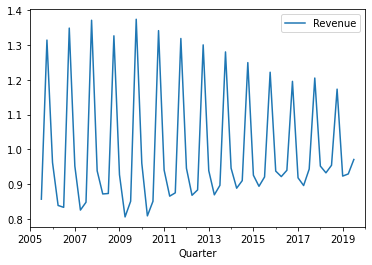

In [51]:
pd.DataFrame(res.observed/res.trend).plot()